## Visualize Ground-Truth Shape Hierarchy of Graphs and Edge Relationships

In [1]:
import sys
print(sys.version)

3.6.5 (default, Jan 19 2020, 17:03:02) 
[GCC Clang 9.0.1 ]


<IPython.core.display.Javascript object>


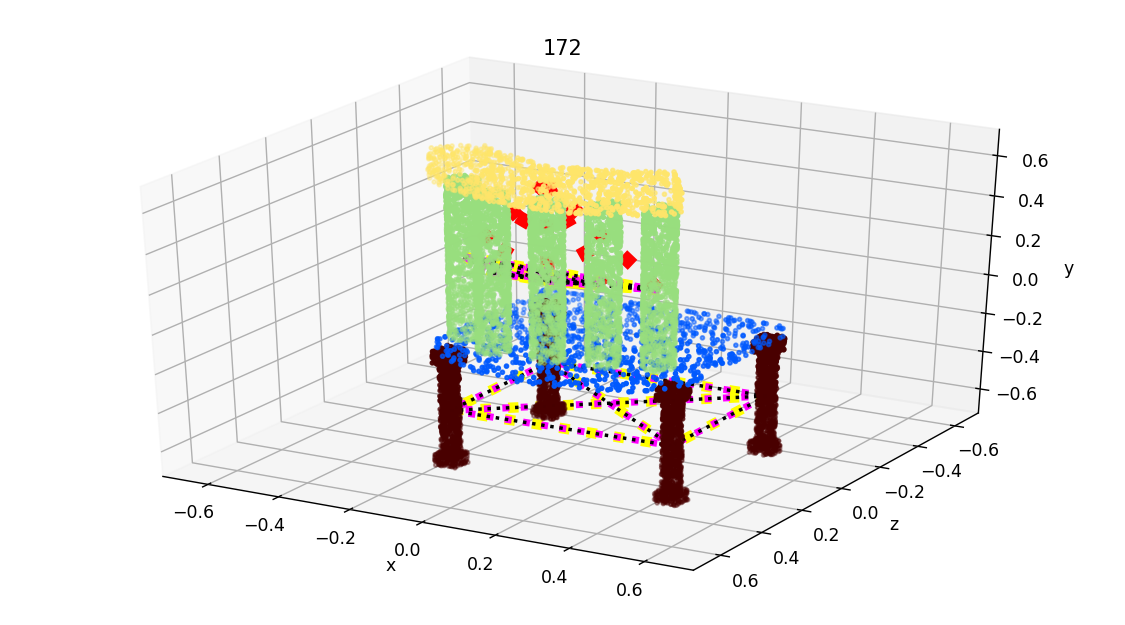

PartNet Hierarchy: (the number in bracket corresponds to PartNet part_id)
0 chair    {0}
  ├0 chair_back    {1}
  |  ├0 back_surface    {2}
  |  |  ├0 back_surface_vertical_bar [LEAF] {3}
  |  |  ├1 back_surface_vertical_bar [LEAF] {4}
  |  |  ├2 back_surface_vertical_bar [LEAF] {5}
  |  |  ├3 back_surface_vertical_bar [LEAF] {6}
  |  |  ├4 back_surface_horizontal_bar [LEAF] {7}
  |  |  ├5 back_surface_vertical_bar [LEAF] {8}
  ├1 chair_seat    {9}
  |  ├0 seat_surface    {10}
  |  |  ├0 seat_single_surface [LEAF] {11}
  ├2 chair_base    {12}
  |  ├0 regular_leg_base    {13}
  |  |  ├0 leg [LEAF] {14}
  |  |  ├1 leg [LEAF] {15}
  |  |  ├2 leg [LEAF] {16}
  |  |  ├3 leg [LEAF] {17}



In [3]:
%matplotlib notebook

import os
import matplotlib
from data import PartNetDataset
from vis_utils import draw_partnet_objects

matplotlib.pyplot.ion()

# ground-truth data directory
root_dir = '../data/partnetdata/chair_hier'

# read all data
obj_list = sorted([int(item.split('.')[0]) for item in os.listdir(root_dir) if item.endswith('.json')])

# visualize one data
obj_id = 0
obj = PartNetDataset.load_object(os.path.join(root_dir, str(obj_list[obj_id])+'.json'), load_geo=True)

# edge visu: ADJ (red), ROT_SYM (yellow), TRANS_SYM (purple), REF_SYM (black)
draw_partnet_objects(objects=[obj], object_names=[str(obj_list[obj_id])], 
                     figsize=(9, 5), leafs_only=True, visu_edges=True, rep='geos',
                     sem_colors_filename='../stats/semantics_colors/Chair.txt')

print('PartNet Hierarchy: (the number in bracket corresponds to PartNet part_id)')
print(obj)

## Point Cloud AE Reconstruction

In [5]:
%matplotlib notebook

import os
import matplotlib
from data import PartNetDataset
from vis_utils import draw_partnet_objects

matplotlib.pyplot.ion()

# results directory
root_dir = '../data/results/pc_ae_chair'

# read all data
obj_list = sorted([int(item) for item in os.listdir(root_dir) if os.path.isdir(os.path.join(root_dir, item))])

# visualize one data
obj_id = 0
obj_dir = os.path.join(root_dir, str(obj_list[obj_id]))
print(obj_dir)

orig_obj = PartNetDataset.load_object(os.path.join(obj_dir, 'orig.json'))
recon_obj = PartNetDataset.load_object(os.path.join(obj_dir, 'recon.json'))
    
draw_partnet_objects(objects=[orig_obj, recon_obj], object_names=['original', 'reconstruction'], 
                     figsize=(9, 5), leafs_only=True, visu_edges=True, rep='geos',
                     sem_colors_filename='../stats/semantics_colors/Chair.txt')

print('Original Structure:')
print(orig_obj)
print('Reconstructed Structure:')
print(recon_obj)

FileNotFoundError: [Errno 2] No such file or directory: '../data/results/pc_ae_chair'

## Point Cloud VAE Free Generation

<IPython.core.display.Javascript object>


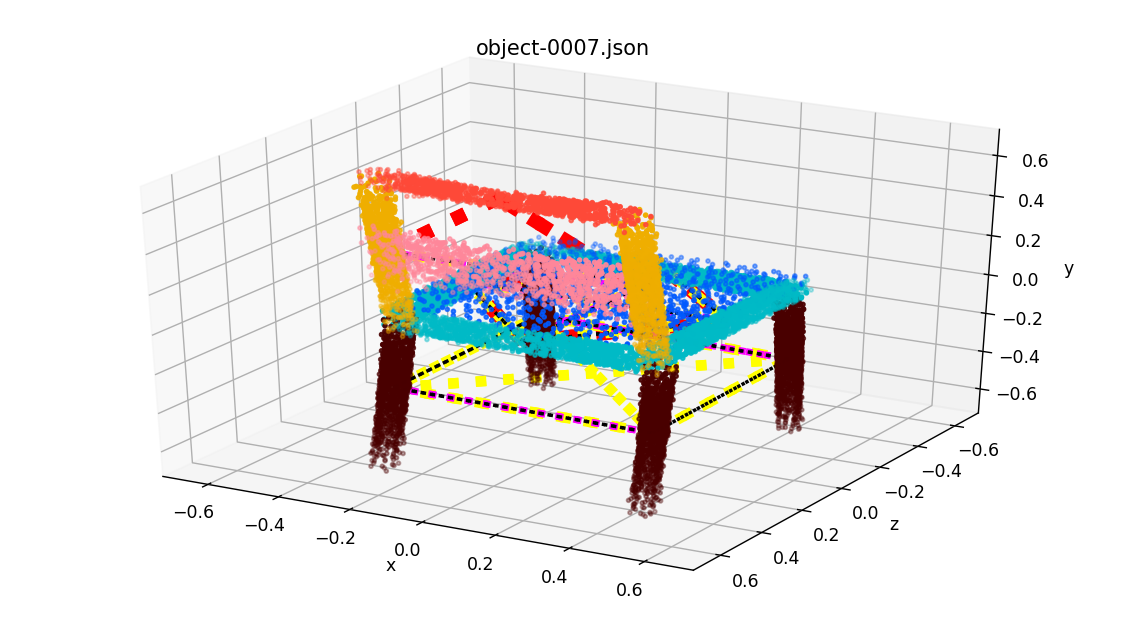

Tree Structure:
0 chair    {0}
  ├0 chair_seat    {0}
  |  ├0 seat_surface    {0}
  |  |  ├0 seat_single_surface [LEAF] {0}
  |  ├1 seat_frame    {0}
  |  |  ├0 seat_frame_bar [LEAF] {0}
  |  |  ├1 seat_frame_bar [LEAF] {0}
  |  |  ├2 seat_frame_bar [LEAF] {0}
  |  |  ├3 seat_frame_bar [LEAF] {0}
  ├1 chair_base    {0}
  |  ├0 regular_leg_base    {0}
  |  |  ├0 leg [LEAF] {0}
  |  |  ├1 leg [LEAF] {0}
  |  |  ├2 leg [LEAF] {0}
  |  |  ├3 leg [LEAF] {0}
  ├2 chair_back    {0}
  |  ├0 back_frame    {0}
  |  |  ├0 back_frame_horizontal_bar [LEAF] {0}
  |  |  ├1 back_frame_vertical_bar [LEAF] {0}
  |  |  ├2 back_frame_vertical_bar [LEAF] {0}
  |  ├1 back_surface    {0}
  |  |  ├0 back_single_surface [LEAF] {0}



In [4]:
%matplotlib notebook

import os
from data import PartNetDataset
from vis_utils import draw_partnet_objects

matplotlib.pyplot.ion()

# results directory
root_dir = '../data/results/pc_vae_chair'

# read all data
obj_list = sorted([item for item in os.listdir(root_dir) if item.endswith('.json')])

# visualize one data
obj_id = 7
obj = PartNetDataset.load_object(os.path.join(root_dir, obj_list[obj_id]))

draw_partnet_objects(objects=[obj], object_names=[obj_list[obj_id]], 
                     figsize=(9, 5), leafs_only=True, visu_edges=True, rep='geos',
                     sem_colors_filename='../stats/semantics_colors/Chair.txt')

print('Tree Structure:')
print(obj)

## Build corresponding bounding box representation

<IPython.core.display.Javascript object>


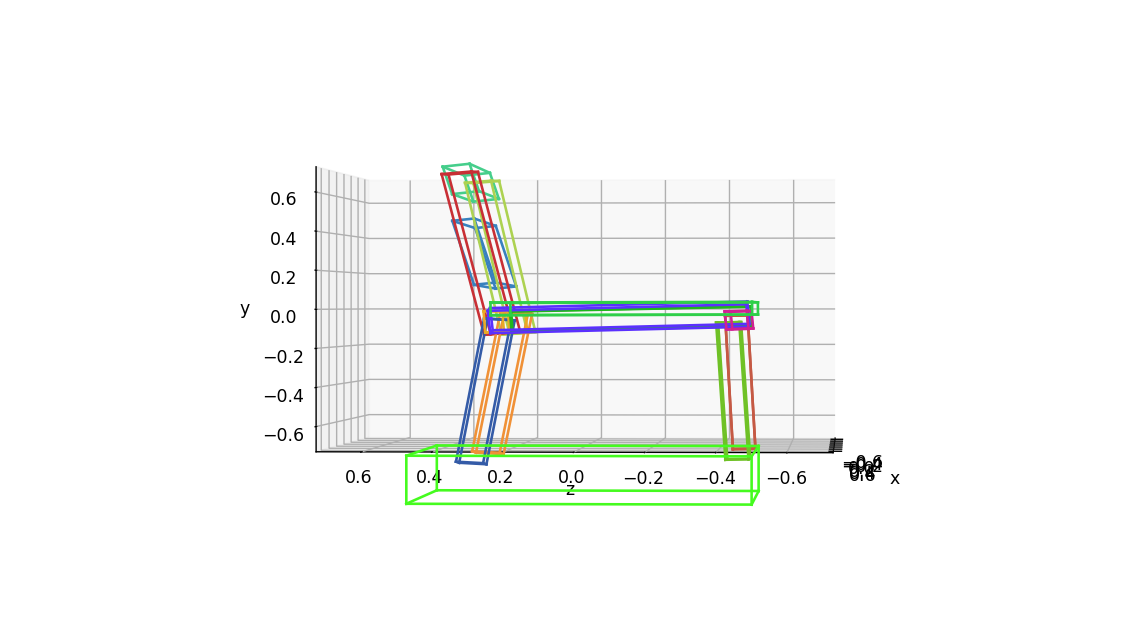

In [11]:
%matplotlib notebook

import pyApproxMVBB as ap
from vis_utils import draw_geo
from matplotlib import pyplot as plt
import numpy as np
import random
import colorsys

def random_color():
    h,s,l = random.random(), 0.5 + random.random()/2.0, 0.4 + random.random()/5.0
    r,g,b = [i for i in colorsys.hls_to_rgb(h,l,s)]
    return (r, g, b)

def process_pointcloud(ax, pcl, coord_rot):
    oobb = ap.approximateMVBB(pts=pcl,
                              epsilon=0.001,
                              pointSamples=500,
                              gridSize=5,
                              mvbbDiamOptLoops=0,
                              mvbbGridSearchOptLoops=5,
                              seed=1234)

    cornerpoints = oobb.getCornerPoints()
    
    for i, point in enumerate(cornerpoints):
        cornerpoints[i] = np.asarray(coord_rot * np.array(point).reshape(-1, 1)).reshape(-1)

    boxcolor = random_color()
    ax.plot([cornerpoints[0][0], cornerpoints[1][0]], [cornerpoints[0][1], cornerpoints[1][1]],
            [cornerpoints[0][2], cornerpoints[1][2]], c=boxcolor)
    ax.plot([cornerpoints[0][0], cornerpoints[2][0]], [cornerpoints[0][1], cornerpoints[2][1]],
            [cornerpoints[0][2], cornerpoints[2][2]], c=boxcolor)
    ax.plot([cornerpoints[1][0], cornerpoints[3][0]], [cornerpoints[1][1], cornerpoints[3][1]],
            [cornerpoints[1][2], cornerpoints[3][2]], c=boxcolor)
    ax.plot([cornerpoints[2][0], cornerpoints[3][0]], [cornerpoints[2][1], cornerpoints[3][1]],
            [cornerpoints[2][2], cornerpoints[3][2]], c=boxcolor)
    ax.plot([cornerpoints[4][0], cornerpoints[5][0]], [cornerpoints[4][1], cornerpoints[5][1]],
            [cornerpoints[4][2], cornerpoints[5][2]], c=boxcolor)
    ax.plot([cornerpoints[4][0], cornerpoints[6][0]], [cornerpoints[4][1], cornerpoints[6][1]],
            [cornerpoints[4][2], cornerpoints[6][2]], c=boxcolor)
    ax.plot([cornerpoints[5][0], cornerpoints[7][0]], [cornerpoints[5][1], cornerpoints[7][1]],
            [cornerpoints[5][2], cornerpoints[7][2]], c=boxcolor)
    ax.plot([cornerpoints[6][0], cornerpoints[7][0]], [cornerpoints[6][1], cornerpoints[7][1]],
            [cornerpoints[6][2], cornerpoints[7][2]], c=boxcolor)
    ax.plot([cornerpoints[0][0], cornerpoints[4][0]], [cornerpoints[0][1], cornerpoints[4][1]],
            [cornerpoints[0][2], cornerpoints[4][2]], c=boxcolor)
    ax.plot([cornerpoints[1][0], cornerpoints[5][0]], [cornerpoints[1][1], cornerpoints[5][1]],
            [cornerpoints[1][2], cornerpoints[5][2]], c=boxcolor)
    ax.plot([cornerpoints[2][0], cornerpoints[6][0]], [cornerpoints[2][1], cornerpoints[6][1]],
            [cornerpoints[2][2], cornerpoints[6][2]], c=boxcolor)
    ax.plot([cornerpoints[3][0], cornerpoints[7][0]], [cornerpoints[3][1], cornerpoints[7][1]],
            [cornerpoints[3][2], cornerpoints[7][2]], c=boxcolor)

    # draw_geo(ax=ax, p=pointcloud, color=(boxcolor[0], boxcolor[1], boxcolor[2], 0.1), rot=coord_rot)
    return cornerpoints

fig = plt.figure(0, figsize=(9, 5))
extent = 0.7

ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.set_xlim(-extent, extent)
ax.set_ylim(extent, -extent)
ax.set_zlim(-extent, extent)
ax.set_xlabel('x')
ax.set_ylabel('z')
ax.set_zlabel('y')
ax.set_proj_type('persp')
coord_rot = np.matrix([[1, 0, 0], [0, 0, -1], [0, 1, 0]])

oobbs = []
for i, leaf in enumerate(obj.graph(leafs_only=True)[1]):
    pointcloud = leaf[0].cpu().numpy().reshape(-1, 3)
    pcl = np.transpose(np.float64(leaf[0].cpu().numpy()))       
    oobbs.append(process_pointcloud(ax=ax, pcl=pcl, coord_rot=coord_rot))
    
# Add ground
max_h_distance = 0
lowest_y = 10000
for oobb in oobbs:
    for cp in oobb:
        lowest_y = min(lowest_y, cp[2])
        max_h_distance = max(max(abs(cp[0]), abs(cp[1])), max_h_distance)
lowest_y = lowest_y + 0.05

ground_extent_h = max_h_distance
ground_extent_v = 0.25
ground_points = np.transpose(np.float64(np.array([
    [-ground_extent_h, lowest_y, -ground_extent_h],
    [ ground_extent_h, lowest_y, -ground_extent_h],
    [ ground_extent_h, lowest_y,  ground_extent_h],
    [-ground_extent_h, lowest_y,  ground_extent_h],
    [-ground_extent_h, lowest_y - ground_extent_v, -ground_extent_h],
    [ ground_extent_h, lowest_y - ground_extent_v, -ground_extent_h],
    [ ground_extent_h, lowest_y - ground_extent_v,  ground_extent_h],
    [-ground_extent_h, lowest_y - ground_extent_v,  ground_extent_h]]
)))
oobbs.append(process_pointcloud(ax=ax, pcl=ground_points, coord_rot=coord_rot))

## Calculate intersection volumes

<IPython.core.display.Javascript object>


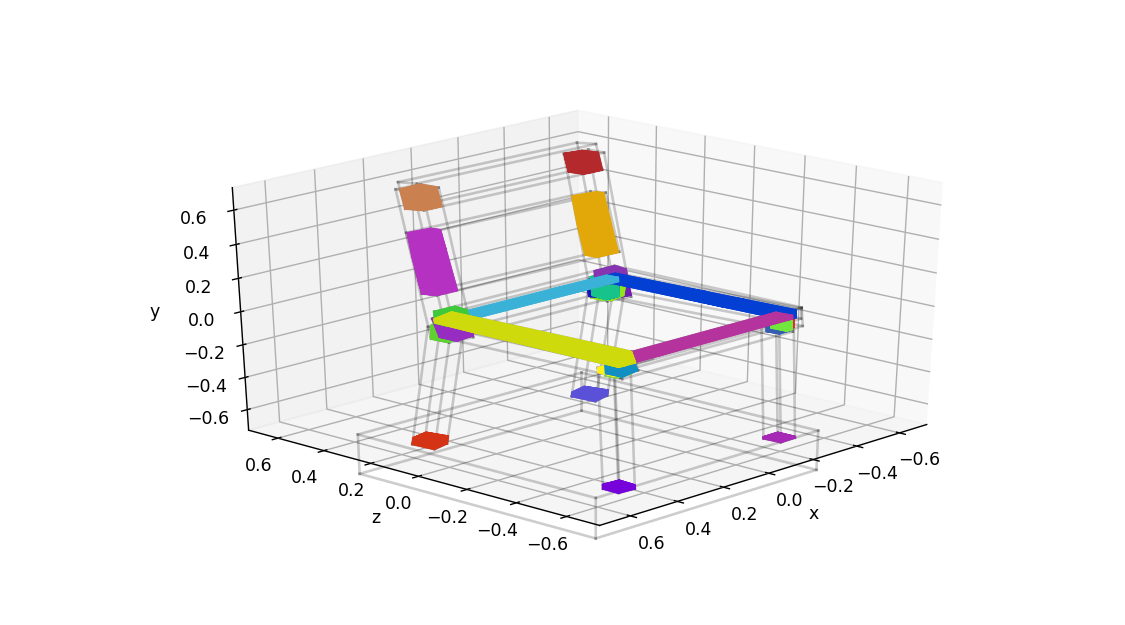

In [12]:
import pymesh
import numpy as np
from matplotlib import pyplot as plt
from vis_utils import draw_pymesh, fill_pymesh

################################

fig2 = plt.figure(1, figsize=(9, 5))
extent = 0.7

ax2 = fig2.add_subplot(1, 1, 1, projection='3d')
ax2.set_xlim(-extent, extent)
ax2.set_ylim(extent, -extent)
ax2.set_zlim(-extent, extent)
ax2.set_xlabel('x')
ax2.set_ylabel('z')
ax2.set_zlabel('y')
ax2.set_proj_type('persp')

meshes = []
for i, cps in enumerate(oobbs):
    # Vertices are in order:
    # [0] = (0, 0, 0)
    # [1] = (1, 0, 0)
    # [2] = (0, 1, 0)
    # [3] = (1, 1, 0)
    # [4] = (0, 0, 1)
    # [5] = (1, 0, 1)
    # [6] = (0, 1, 1)
    # [7] = (1, 1, 1)
    
    v = cps
    f = np.array([
        [0, 2, 3], [0, 3, 1], # front
        [5, 7, 6], [5, 6, 4], # back
        [4, 6, 2], [4, 2, 0], # left
        [1, 3, 7], [1, 7, 5], # right
        [2, 6, 7], [2, 7, 3], # top
        [4, 0, 1], [4, 1, 5]  # bottom
    ])
    meshes.append(pymesh.form_mesh(vertices=v, faces=f))

    # ONLY FOR VISUALIZATION PURPOSES
    f_quads = np.array([
        [0, 2, 3, 1], # front
        [5, 7, 6, 4], # back
        [4, 6, 2, 0], # left
        [1, 3, 7, 5], # right
        [2, 6, 7, 3], # top
        [4, 0, 1, 5]  # bottom
    ])
    draw_pymesh(ax=ax2, mesh=pymesh.form_mesh(vertices=v, faces=f_quads), color=(0.0, 0.0, 0.0, 0.1))
    
unique_pairs = []
for i in range(len(meshes)):
    for j in range(len(meshes)):
        if not i == j and not (i, j) in unique_pairs and not (j, i) in unique_pairs:
            unique_pairs.append((i, j))

cutvolumes = []
for (i, j) in unique_pairs:
    cvol = pymesh.boolean(meshes[i], meshes[j], operation="intersection", engine="igl")
    if len(cvol.vertices) == 0:
        continue
    cutvolumes.append(cvol)

for cv in cutvolumes:
    fill_pymesh(ax=ax2, mesh=cv, color=random_color())
